# Floor: analyses mobileDNA

## Opzet:

- Perceptie smartphonegebruik vs geregistreerd smartphonegebruik
  - Gemiddeld aantal uren per dag (tijdens week & weekend)
    - Kolom: per participant
      - gemiddelde totale smartphonegebruik per dag (week) = appevents + sessions
        - Gemiddelde totale duur van sessies
      - Gemiddelde totale smartphonegebruik per dag (weekend) = appevents + sessions
        - Gemiddelde totale duur van sessies

- Piekgebruik tijdens dag
  - Kolom: per participant:
    - Gemiddelde gebruik per moment vd dag (6 blokken) = appevents + sessions

- Meest gebruikte apps
  - Kolom: per participant:
    - per categorie apps (6 categorieën) 
      - Hoe vaak worden apps van een bepaalde categorie geraadpleegd per dag?
      - Hoe lang worden apps van een bepaalde categorie geraadpleegd tijdens een sessie? 
      - Wanneer worden apps van een bepaalde categorie het meest geraadpleegd tijdens een dag? 

- Indicatie gebruik voor slaap en na slaap: wanneer gemiddeld eerste & laatste gebruik?
  - Kolom: per participant:
    - Gemiddelde moment: eerste gebruik = eerste moment van dag appevents & sessions)
    - Gemiddelde moment: laatste gebruik = eerste moment van dag appevents &  sessions

- Zelfrapportage gebruik school ó agenda & MobileDNA
  - Time series per participant: 
    - Aantal switches & appevents + sessies (/dagen in week) terwijl participant aangaf op school te zijn/te werken voor school

- Smartphone gebruik/multitasking ó multitasking preference (vragenlijst)

  - Algemene mate van smartphonegebruik
    - Kolom per participant
      - Gemiddeld # sessies
      - Gemiddelde duur sessie 
    - =>  gemiddeld # sessies = indicatie multitasking. 

  - Multitasking binnen smartphone
    - Kolom: per participant
      - Gemiddeld # switchen tussen apps tijdens sessie 

  - Multitasking als smartphonegebruik tijdens andere taak
    - Smartphonegebruik gekoppeld met les/school-agenda
      - Time series per participant:
        - Aantal switches & appevents + sessies terwijl participant aangaf op school te zijn/te werken voor school

### Voorbereiding

In [1]:
# imports, data inladen
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm   #progressbar
tqdm.pandas()   #progressbar instantiëren voor pandas

In [2]:
app_filename = "../data/floor/floor_appevents.csv"
notif_filename = "../data/floor/floor_notifications.csv"

In [3]:
df = pd.read_csv(app_filename, sep=";", parse_dates=['startTime', 'endTime'])

In [4]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95670 entries, 0 to 95669
Data columns (total 13 columns):
application        95670 non-null object
battery            95670 non-null float64
data_version       95670 non-null float64
endTime            95670 non-null datetime64[ns]
endTimeMillis      95670 non-null int64
id                 95670 non-null object
latitude           95670 non-null float64
longitude          95670 non-null float64
model              95670 non-null object
notification       95670 non-null bool
session            95670 non-null int64
startTime          95670 non-null datetime64[ns]
startTimeMillis    95670 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(4), int64(3), object(3)
memory usage: 8.9+ MB


In [5]:
# dupliactes
pd.concat(g for _, g in df.groupby(["startTime","application","endTime"]) if len(g) > 1)

,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis
72808,com.snapchat.android,88.0,1.4,2018-11-01 14:56:01.164,1541080561164,315a421f-d38e-42e5-8c63-fedd71213f0a,0.000000,0.000000,SM-G960F,True,1541080546,2018-11-01 14:55:48.464,1541080548464
73268,com.snapchat.android,88.0,1.4,2018-11-01 14:56:01.164,1541080561164,315a421f-d38e-42e5-8c63-fedd71213f0a,0.000000,0.000000,SM-G960F,True,1541080546,2018-11-01 14:55:48.464,1541080548464
74011,com.spotify.music,88.0,1.4,2018-11-01 14:56:57.411,1541080617411,315a421f-d38e-42e5-8c63-fedd71213f0a,0.000000,0.000000,SM-G960F,False,1541080598,2018-11-01 14:56:41.200,1541080601200
74012,com.spotify.music,88.0,1.4,2018-11-01 14:56:57.411,1541080617411,315a421f-d38e-42e5-8c63-fedd71213f0a,0.000000,0.000000,SM-G960F,False,1541080598,2018-11-01 14:56:41.200,1541080601200
74013,com.spotify.music,88.0,1.4,2018-11-01 14:57:43.348,1541080663348,315a421f-d38e-42e5-8c63-fedd71213f0a,0.000000,0.000000,SM-G960F,False,1541080659,2018-11-01 14:57:42.166,1541080662166
74699,com.spotify.music,88.0,1.4,2018-11-01 14:57:43.348,1541080663348,315a421f-d38e-42e5-8c63-fedd71213f0a,0.000000,0.000000,SM-G960F,False,1541080659,2018-11-01 14:57:42.166,1541080662166
73267,com.facebook.katana,88.0,1.4,2018-11-01 14:59:18.444,1541080758444,315a421f-d38e-42e5-8c63-fedd71213f0a,0.000000,0.000000,SM-G960F,False,1541080659,2018-11-01 14:57:44.148,1541080664148
74014,com.facebook.katana,88.0,1.4,2018-11-01 14:59:18.444,1541080758444,315a421f-d38e-42e5-8c63-fedd71213f0a,0.000000,0.000000,SM-G960F,False,1541080659,2018-11-01 14:57:44.148,1541080664148
73269,com.android.systemui,86.0,1.4,2018-11-01 15:10:13.155,1541081413155,315a421f-d38e-42e5-8c63-fedd71213f0a,0.000000,0.000000,SM-G960F,False,1541081409,2018-11-01 15:10:12.199,1541081412199
74997,com.android.systemui,86.0,1.4,2018-11-01 15:10:13.155,1541081413155,315a421f-d38e-42e5-8c63-fedd71213f0a,0.000000,0.000000,SM-G960F,False,1541081409,2018-11-01 15:10:12.199,1541081412199


In [6]:
df = df.drop_duplicates(["startTime","application","endTime"])

In [7]:
# Smartphone gebruik gedurende de dag
blokken = [0, 3, 6, 9, 12, 15, 18, 21, 24]
df["uurblok"] = pd.cut(df['startTime'].dt.hour, bins=blokken)

In [8]:
df.uurblok.value_counts()

(15, 18]    17967
(18, 21]    17862
(12, 15]    17524
(9, 12]     16068
(21, 24]     8517
(6, 9]       8111
(0, 3]       2712
(3, 6]        806
Name: uurblok, dtype: int64

In [9]:
cache_path = "../data/cache/"
app_dict = np.load(cache_path + "app_dict.npy").item()

In [10]:
# Apps categoriseren met script Wouter, licht aangepast
def annotate(df: pd.DataFrame, app_dict: dict, type:str, lookup=False) -> (pd.DataFrame, dict):
    """Annotate virgin data with duration, app meta data."""

    # Does the data frame contain an application column? If not, bugger off.
    if "application" not in df:
        raise Exception("Need an application column to be able to annotate")

    # If lookup is set to True, update app data base, otherwise work locally
    if lookup:
        update_app_meta(df=df, app_dict=app_dict)

    # Store unclassified apps, and how much they occur
    unclassified = {}

    # Subroutine to get genre
    def get_genre_id(row):
        try:
            genre = app_dict[row['application']]['genre_id']
        except:
            genre = 'unknown'
        return genre

    # Subroutine to get app name (no spaces)
    def get_app_name(row, sep="_"):
        try:
            name = app_dict[row['application']]['app_name'].replace(" ", sep)
        except:
            name = 'unknown'
            if row['application'] in unclassified:
                unclassified[row['application']] += 1
            else:
                unclassified[row['application']] = 1
        return name

    # Annotate actual data frame
    try:
        df['app_genre_id'] = df.apply(lambda row: get_genre_id(row), axis=1)
        df['app_name'] = df.apply(lambda row: get_app_name(row), axis=1)
    except Exception as e:
        print("Annotations failed! - ", e)

    return df, unclassified

In [11]:
df_new, unclassified = annotate(df, app_dict=app_dict, type="appevents", lookup=False)

In [12]:
df_new['datum'] = df_new['startTime'].dt.date
df_new['duur'] = (df_new['endTimeMillis'] - df_new['startTimeMillis']) / 1000

In [13]:
df_new.head()

,application,battery,data_version,endTime,endTimeMillis,id,latitude,longitude,model,notification,session,startTime,startTimeMillis,uurblok,app_genre_id,app_name,datum,duur
0,com.tinder,67.0,1.4,2018-11-06 18:31:18.495,1541525478495,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541525474,2018-11-06 18:31:16.853,1541525476853,"(15, 18]",LIFESTYLE,Tinder,2018-11-06,1.642
1,com.tinder,67.0,1.4,2018-11-06 18:36:03.063,1541525763063,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541525645,2018-11-06 18:34:08.065,1541525648065,"(15, 18]",LIFESTYLE,Tinder,2018-11-06,114.998
2,com.instagram.android,73.0,1.4,2018-11-07 19:24:56.992,1541615096992,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541614866,2018-11-07 19:24:54.966,1541615094966,"(18, 21]",SOCIAL,Instagram,2018-11-07,2.026
3,com.android.systemui,69.0,1.4,2018-11-07 19:38:12.620,1541615892620,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541614866,2018-11-07 19:38:10.092,1541615890092,"(18, 21]",unknown,unknown,2018-11-07,2.528
4,com.facebook.orca,64.0,1.4,2018-11-07 23:04:25.243,1541628265243,8a2f0420-8011-4adc-b128-95a40786d765,0.0,0.0,HUAWEI NMO-L31,False,1541628241,2018-11-07 23:04:03.090,1541628243090,"(21, 24]",COMMUNICATION,Messenger_–_Text_and_Video_Chat_for_Free,2018-11-07,22.153


### Analyses

#### Piekgebruik tijdens dag

In [14]:
# Gemiddeld gebruik per moment: aantal appevents per blok, aantal unieke sessies per bok
(df.groupby(['id', 'uurblok'])
     .agg({'application': 'count', 'session': 'nunique'})
     .rename(columns={'application': 'appevents', 'session': 'un_sessions'}))

appevents  un_sessions
id                                   uurblok                         
066873fe-d25d-4fcc-bca8-01bd573bcf7e (0, 3]          253           50
                                     (6, 9]          270           37
                                     (9, 12]         218           56
                                     (12, 15]        459           57
                                     (15, 18]        301           64
                                     (18, 21]        539          126
                                     (21, 24]        266           36
0870854d-f706-4144-bcb4-0ace2e447425 (0, 3]           92           36
                                     (3, 6]            6            2
                                     (6, 9]          275           85
                                     (9, 12]         288          118
                                     (12, 15]        329          121
                                     (15, 18]        431          166
                                     (18, 21]        318          147
                                     (21, 24]        250           87
0e89fbaf-ebe1-455c-a3fc-0145f89ab80a (6, 9]           61           13
                                     (9, 12]         109           21
                                     (12, 15]         96           16
                                     (15, 18]         52           11
                                     (18, 21]        123           28
                                     (21, 24]         35            7
115b2e73-f696-4628-9c3c-287a23b88e36 (3, 6]            7            2
                                     (6, 9]          312          104
                                     (9, 12]         383          137
                                     (12, 15]        567          153
                                     (15, 18]        587          161
                                     (18, 21]        551          156
                                     (21, 24]        201           85
12bca59c-3c51-4386-a48f-bf96b3ff87b3 (9, 12]          32           10
                                     (12, 15]         83           18
...                                                  ...          ...
de804e64-8c52-4834-a2fa-a12f43ebf38d (0, 3]            6            3
                                     (6, 9]          136           63
                                     (9, 12]         155           90
                                     (12, 15]        111           52
                                     (15, 18]        398          145
                                     (18, 21]        347          147
                                     (21, 24]        138           45
e8e93b44-0acd-434e-be39-5a8f4cf77c21 (0, 3]           16            9
                                     (3, 6]          110           70
                                     (6, 9]          338          160
                                     (9, 12]         492          178
                                     (12, 15]        652          258
                                     (15, 18]        455          157
                                     (18, 21]        600          248
                                     (21, 24]        295          134
ec739037-4ad1-42db-8711-8ea8dc1e354f (0, 3]          184           61
                                     (3, 6]           65           19
                                     (6, 9]          241           59
                                     (9, 12]         795          197
                                     (12, 15]        835          259
                                     (15, 18]       1136          318
                                     (18, 21]       1021          326
                                     (21, 24]        314          107
f8f39e51-6991-4c73-9f40-f9c59522bb3d (0, 3]            3            1
                                     (6, 9]          436 

#### Meest gebruikte apps

In [15]:
# Hoe vaak apps per categorie, per dag: zie core.csv

In [16]:
# Aantal appevents per persoon, per categorie gedeeld door aantal dagen dat categorie gelogd is
df_new.groupby(['id','datum'])['app_genre_id'].value_counts().groupby(['id','app_genre_id']).mean()

id                                    app_genre_id       
066873fe-d25d-4fcc-bca8-01bd573bcf7e  COMMUNICATION           45.733333
                                      HEALTH_AND_FITNESS       2.500000
                                      LIFESTYLE                1.857143
                                      MAPS_AND_NAVIGATION      1.500000
                                      NEWS_AND_MAGAZINES       9.000000
                                      PHOTOGRAPHY              6.000000
                                      PRODUCTIVITY             2.571429
                                      SOCIAL                   2.100000
                                      SPORTS                   6.769231
                                      TOOLS                   25.500000
                                      TRAVEL_AND_LOCAL         1.000000
                                      VIDEO_PLAYERS            5.166667
                                      unknown                 70.200000
087085

In [17]:
# Aantal appevents per persoon, per genre, gedeeld door totaal aantal dagen gelogd
df_new.groupby(['id'])['app_genre_id'].value_counts() / df_new.groupby(['id'])['datum'].nunique()

id                                    app_genre_id       
066873fe-d25d-4fcc-bca8-01bd573bcf7e  unknown                 70.200000
                                      COMMUNICATION           45.733333
                                      TOOLS                   23.800000
                                      NEWS_AND_MAGAZINES       7.200000
                                      SPORTS                   5.866667
                                      VIDEO_PLAYERS            4.133333
                                      SOCIAL                   1.400000
                                      HEALTH_AND_FITNESS       1.333333
                                      PRODUCTIVITY             1.200000
                                      LIFESTYLE                0.866667
                                      MAPS_AND_NAVIGATION      0.600000
                                      PHOTOGRAPHY              0.400000
                                      TRAVEL_AND_LOCAL         0.066667
087085

In [18]:
# Hoe lang apps per categorie, per dag: zie core.csv
df_new.groupby(['id','datum','app_genre_id'])['duur'].sum()

id                                    datum       app_genre_id       
066873fe-d25d-4fcc-bca8-01bd573bcf7e  2018-11-03  COMMUNICATION           1573.422
                                                  LIFESTYLE                 15.525
                                                  NEWS_AND_MAGAZINES       669.307
                                                  PRODUCTIVITY              36.596
                                                  SPORTS                   470.584
                                                  TOOLS                    255.885
                                                  VIDEO_PLAYERS           1063.549
                                                  unknown                  115.324
                                      2018-11-04  COMMUNICATION           5191.790
                                                  MAPS_AND_NAVIGATION       93.674
                                                  NEWS_AND_MAGAZINES       235.834
                 

#### Gebruik voor en na slaap

Eerste en laatste gsm-uur van de dag: <br/>
Eerste gsm-uur is relatief eenvoudig te berekenen. We kijken gewoon naar de frequentie van uren per dag, per responden en nemen daar de minimale waarde van.<br/>
We moeten enkel zorgen dat we een relevante cut-off om de 'nachturen' er uit te filteren.<br/>
Bijv: stel we kijken naar de minimale waarde vanaf 4u 's ochtends.

In [19]:
# Gemiddeld eerste moment van de dag
df_new['uur'] = df_new['startTime'].dt.hour # enkel uur ipv. volledige timestamp

In [20]:
#df_new.groupby(['id','datum'])['uur'].min().value_counts()

In [21]:
#df_new.groupby(['id','datum'])['uur'].max().value_counts()

In [22]:
# Startuur, filter voor 'nacht' (na 0? na 1? na 2? etc.)
df_new[df_new['uur']>3].groupby(['id','datum'])['uur'].min().groupby('id').describe()

,count,mean,std,min,25%,50%,75%,max
id,,,,,,,,
066873fe-d25d-4fcc-bca8-01bd573bcf7e,15.0,10.800000,3.858201,7.0,8.00,10.0,12.50,20.0
0870854d-f706-4144-bcb4-0ace2e447425,17.0,7.588235,2.526332,4.0,7.00,7.0,8.00,16.0
0e89fbaf-ebe1-455c-a3fc-0145f89ab80a,3.0,12.333333,7.505553,8.0,8.00,8.0,14.50,21.0
115b2e73-f696-4628-9c3c-287a23b88e36,17.0,7.882353,1.166316,5.0,7.00,8.0,9.00,10.0
12bca59c-3c51-4386-a48f-bf96b3ff87b3,3.0,12.333333,2.516611,10.0,11.00,12.0,13.50,15.0
1c91aec2-3e08-42ff-9bf8-85ee52f8191a,15.0,8.600000,4.272838,4.0,7.00,8.0,9.50,22.0
2ace9454-bd07-44fc-9fc0-4037fffce039,13.0,7.538462,2.536907,5.0,6.00,7.0,9.00,14.0
315a421f-d38e-42e5-8c63-fedd71213f0a,17.0,8.294118,2.084607,5.0,7.00,9.0,10.00,11.0
33f9af6c-0843-4580-b902-32b88d467402,17.0,9.588235,3.571744,4.0,7.00,10.0,10.00,20.0


In [23]:
# Negeren, is om eventueel te kijken naar appgebruik in dat eerste uur
"""
appsBlok = df_new.groupby(['id','datum'])['uur'].value_counts().reset_index(name = 'aantal').sort_values(['datum','uur'])

# Array van alle datums om te gebruiken in for-loop
datumArray = df_new['datum'].unique()
#startUren = appsBlok[appsBlok['uur'] > 1].groupby(['datum'])['uur'].nsmallest(1).reset_index(name='startUur')
startUren = appsBlok[appsBlok['uur'] > 1].groupby(['id','datum'])['uur'].min().reset_index(name='startUur')
"""

"\nappsBlok = df_new.groupby(['id','datum'])['uur'].value_counts().reset_index(name = 'aantal').sort_values(['datum','uur'])\n\n# Array van alle datums om te gebruiken in for-loop\ndatumArray = df_new['datum'].unique()\n#startUren = appsBlok[appsBlok['uur'] > 1].groupby(['datum'])['uur'].nsmallest(1).reset_index(name='startUur')\nstartUren = appsBlok[appsBlok['uur'] > 1].groupby(['id','datum'])['uur'].min().reset_index(name='startUur')\n"

In [25]:
"""# for-loop over df dict
dfdict = dict()
for index, row in startUren.iterrows():
    temp = df[(df['datum'] == row['datum']) & (df['uur'] == row['startUur'])].sort_values('startTime')
    temp2 = temp['application'].value_counts().reset_index(name='aantal')
    temp3 = temp2[temp2['aantal'] > 0]
    dfdict['dag_{}'.format(index)] = temp3
"""

"# for-loop over df dict\ndfdict = dict()\nfor index, row in startUren.iterrows():\n    temp = df[(df['datum'] == row['datum']) & (df['uur'] == row['startUur'])].sort_values('startTime')\n    temp2 = temp['application'].value_counts().reset_index(name='aantal')\n    temp3 = temp2[temp2['aantal'] > 0]\n    dfdict['dag_{}'.format(index)] = temp3\n"

In [26]:
#somdf = pd.concat(dfdict, ignore_index=True).groupby(['index'], as_index=False).sum()
#somdf = somdf[somdf['aantal'] > 0].reset_index(drop=True).sort_values('aantal', ascending=False)
#somdf['pct'] = (somdf['aantal'] / somdf['aantal'].sum()) * 100

Gemiddeld laatste moment van de dag: <br/>
Dit is al iets moeilijker. Maximum-uurblok van de dag is 23-24, maar natuurlijk ook vaak gsm-gebruik na middernacht.<br/>
Zullen moeten kijken om een functie te schrijven die kijkt naar:<br/>
- laatste gebruik van de dag
- eerste x gebruiksuren van de volgende dag (opnieuw, cut-off nodig vanaf wanneer het 'ochtend' is - bijv. tot 4-5u)
- hier een vergelijking doet en dan een waarde teruggeeft

In [27]:
# Maximum uurblok voor elke logdag, per respondent, gegroepeerd - beschrijvende resultaten
df_new.groupby(['id','datum'])['uur'].max().groupby('id').describe()

,count,mean,std,min,25%,50%,75%,max
id,,,,,,,,
066873fe-d25d-4fcc-bca8-01bd573bcf7e,15.0,22.133333,1.187234,20.0,22.00,23.0,23.0,23.0
0870854d-f706-4144-bcb4-0ace2e447425,17.0,22.352941,1.366619,18.0,22.00,23.0,23.0,23.0
0e89fbaf-ebe1-455c-a3fc-0145f89ab80a,3.0,19.666667,4.932883,14.0,18.00,22.0,22.5,23.0
115b2e73-f696-4628-9c3c-287a23b88e36,17.0,22.352941,0.785905,20.0,22.00,22.0,23.0,23.0
12bca59c-3c51-4386-a48f-bf96b3ff87b3,3.0,17.333333,1.527525,16.0,16.50,17.0,18.0,19.0
1c91aec2-3e08-42ff-9bf8-85ee52f8191a,15.0,22.933333,0.258199,22.0,23.00,23.0,23.0,23.0
2ace9454-bd07-44fc-9fc0-4037fffce039,13.0,22.307692,0.751068,21.0,22.00,22.0,23.0,23.0
315a421f-d38e-42e5-8c63-fedd71213f0a,17.0,22.882353,0.332106,22.0,23.00,23.0,23.0,23.0
33f9af6c-0843-4580-b902-32b88d467402,17.0,21.764706,3.400908,9.0,22.00,23.0,23.0,23.0


In [28]:
# Gebruik tijdens "nacht"
df_new[df_new['uur']<5].groupby(['id','datum'])['uur'].min().groupby('id').describe()

,count,mean,std,min,25%,50%,75%,max
id,,,,,,,,
066873fe-d25d-4fcc-bca8-01bd573bcf7e,14.0,0.428571,0.937614,0.0,0.0,0.0,0.00,3.0
0870854d-f706-4144-bcb4-0ace2e447425,8.0,0.375000,1.060660,0.0,0.0,0.0,0.00,3.0
115b2e73-f696-4628-9c3c-287a23b88e36,2.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
1c91aec2-3e08-42ff-9bf8-85ee52f8191a,10.0,0.400000,1.264911,0.0,0.0,0.0,0.00,4.0
2ace9454-bd07-44fc-9fc0-4037fffce039,1.0,0.000000,NaN,0.0,0.0,0.0,0.00,0.0
315a421f-d38e-42e5-8c63-fedd71213f0a,11.0,0.181818,0.404520,0.0,0.0,0.0,0.00,1.0
33f9af6c-0843-4580-b902-32b88d467402,12.0,0.416667,0.900337,0.0,0.0,0.0,0.25,3.0
344951f7-e801-4a8a-a260-92b2b10b67a6,17.0,0.176471,0.392953,0.0,0.0,0.0,0.00,1.0
411a7780-26b5-4e51-b086-74d1aac41d23,8.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0


In [29]:
# Vroegste loguur per dag, per respondent
df_new[df_new['uur']<5].groupby(['id','datum'])['uur'].min()

id                                    datum     
066873fe-d25d-4fcc-bca8-01bd573bcf7e  2018-11-04    0
                                      2018-11-05    0
                                      2018-11-06    0
                                      2018-11-07    3
                                      2018-11-08    1
                                      2018-11-09    0
                                      2018-11-10    0
                                      2018-11-11    0
                                      2018-11-12    0
                                      2018-11-13    0
                                      2018-11-14    0
                                      2018-11-15    2
                                      2018-11-16    0
                                      2018-11-17    0
0870854d-f706-4144-bcb4-0ace2e447425  2018-11-01    0
                                      2018-11-06    3
                                      2018-11-09    0
                                 

#### Nieuw: via methode


In [33]:
# DataFrame met alle combinaties van: id + datum
id_dat = df.groupby(['id','datum']).size().reset_index(name="count")
id_dat.drop('count', axis=1, inplace=True)

In [34]:
# Functie die zoekt naar naar laatste 'ochtenduur' van volgende dag, 
# ofwel laatste uur van huidige dag
def findSlaapuur(row):
    id = row['id']
    datum_mor = row['datum'] + dt.timedelta(days=1)
    
    temp = df[(df['id'] == id) & (df['endTime'].dt.date == datum_mor) & (df['endTime'].dt.hour < 5)] 
    
    if temp.empty:
        datum = row['datum']
        temp = df[(df['id'] == id) & (df['datum'] == datum)]
        max = temp['endTime'].max()

    else:
        max = temp['endTime'].max()
    
    return max

In [35]:
# Functie toepassen op dataframe (met progressbar :-))
id_dat['slaapUur'] = id_dat.progress_apply(findSlaapuur, axis=1)

100%|██████████| 519/519 [00:25<00:00, 18.05it/s]


##### Waakuur berekenen:
Waakuur = eerste uur van activiteit na bepaalde grenswaarde. <br/>
Voor deze berekening geopteerd voor grenswaarde **3u**.

In [39]:
# 'Waakuur'
waakdf = df[df['startTime'].dt.hour > 3].groupby(['id','datum'])['startTime'].min().reset_index()
slaap_waak = id_dat.merge(waakdf, on=['id','datum'])
slaap_waak.columns =['id','datum','slaapUur','waakUur']
slaap_waak['sl_u'] = slaap_waak['slaapUur'].dt.hour

# Gemiddeldes natuurlijk niet echt relevant nu, belangrijker kijken naar modus?
slaap_waak.groupby('id')['sl_u'].describe()

,count,mean,std,min,25%,50%,75%,max
id,,,,,,,,
066873fe-d25d-4fcc-bca8-01bd573bcf7e,15.0,2.733333,4.905779,0.0,0.50,2.0,2.50,20.0
0870854d-f706-4144-bcb4-0ace2e447425,17.0,11.176471,10.649151,0.0,1.00,4.0,22.00,23.0
0e89fbaf-ebe1-455c-a3fc-0145f89ab80a,3.0,20.333333,3.785939,16.0,19.00,22.0,22.50,23.0
115b2e73-f696-4628-9c3c-287a23b88e36,17.0,19.647059,7.432540,0.0,22.00,22.0,23.00,23.0
12bca59c-3c51-4386-a48f-bf96b3ff87b3,3.0,17.333333,1.527525,16.0,16.50,17.0,18.00,19.0
1c91aec2-3e08-42ff-9bf8-85ee52f8191a,15.0,8.866667,10.280819,0.0,1.00,4.0,22.50,23.0
2ace9454-bd07-44fc-9fc0-4037fffce039,13.0,18.846154,8.394901,0.0,21.00,22.0,23.00,23.0
315a421f-d38e-42e5-8c63-fedd71213f0a,17.0,10.235294,10.934632,0.0,1.00,3.0,23.00,23.0
33f9af6c-0843-4580-b902-32b88d467402,17.0,8.294118,9.726026,0.0,2.00,2.0,22.00,23.0


In [41]:
# Overzichts DataFrame met per id, datum: uur van slapen en waken
slaap_waak

,id,datum,slaapUur,waakUur,sl_u
0,066873fe-d25d-4fcc-bca8-01bd573bcf7e,2018-11-03,2018-11-04 00:58:10.803,2018-11-03 20:21:03.434,0
1,066873fe-d25d-4fcc-bca8-01bd573bcf7e,2018-11-04,2018-11-05 01:26:26.210,2018-11-04 14:17:02.485,1
2,066873fe-d25d-4fcc-bca8-01bd573bcf7e,2018-11-05,2018-11-06 00:37:55.832,2018-11-05 08:24:06.449,0
3,066873fe-d25d-4fcc-bca8-01bd573bcf7e,2018-11-06,2018-11-07 03:50:02.568,2018-11-06 08:01:58.478,3
4,066873fe-d25d-4fcc-bca8-01bd573bcf7e,2018-11-07,2018-11-08 02:09:51.371,2018-11-07 17:40:37.318,2
5,066873fe-d25d-4fcc-bca8-01bd573bcf7e,2018-11-08,2018-11-09 03:51:51.185,2018-11-08 07:00:04.098,3
6,066873fe-d25d-4fcc-bca8-01bd573bcf7e,2018-11-09,2018-11-10 02:45:36.776,2018-11-09 10:02:08.952,2
7,066873fe-d25d-4fcc-bca8-01bd573bcf7e,2018-11-10,2018-11-11 03:40:24.269,2018-11-10 13:39:07.951,3
8,066873fe-d25d-4fcc-bca8-01bd573bcf7e,2018-11-11,2018-11-12 02:11:52.378,2018-11-11 12:05:02.109,2
9,066873fe-d25d-4fcc-bca8-01bd573bcf7e,2018-11-12,2018-11-13 00:41:20.604,2018-11-12 11:09:56.936,0


##### Slaapuren visueel
1. Slaapuren centreren rond middernacht
2. Heatmap voor de hele dataset

In [42]:
# Functie om 'nachtwaarden' te centreren rond middernacht (voor visualisatie)
def centreer(row):
    try:
        if (row['sl_u'] < 12):
            temp = row['sl_u'] + 24
            return temp
        else:
            temp = row['sl_u']
            return temp
    except KeyError:
        pass

In [43]:
slaap_waak['sl_c'] = slaap_waak.apply(centreer, axis=1)

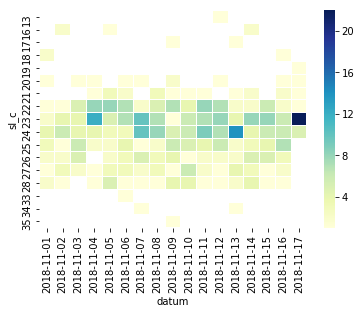

In [45]:
# Heatmap met aantal counts voor 'slaapUren' per datum, over de gehele dataset
df_heat = slaap_waak.groupby(["sl_c", "datum"])["slaapUur"].size().reset_index(name="size")
df_heat2 = df_heat.pivot("sl_c", "datum", "size")
sns.heatmap(df_heat2, cmap="YlGnBu", linewidths=.1)

### Spreiding gsm-gebruik doorheen dag

#### Heatmap, voor alle respondenten samen

In [47]:
# Appevent heatmap, uur en dag van de week?
df_new['dag'] = df_new['startTime'].dt.weekday_name
days_arr = ["Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

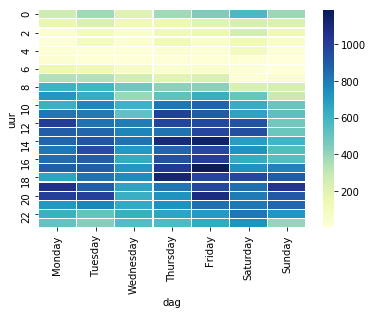

In [48]:
df_heat = df.groupby(["uur", "dag"])["application"].size().reset_index()
df_heat2 = df_heat.pivot("uur", "dag", "application")
df_heat2 = df_heat2.reindex(days_arr, axis=1)
sns.heatmap(df_heat2, cmap="YlGnBu", linewidths=.1)

#### Gebruik school

In [49]:
# Aantal switches & appevents + sessies (/dagen in week) tijdens school 'momenten'

Schoolmomenten eerst bepalen, dan analyse hierop.

#### Multitasking

Gemiddeld aantal switches tussen apps tijdens sessie. <br/>

Belangrijk te bepalen wat een switch is!<br/>
Voorbeeld: iemand heeft op één sessie 5 appevents en 3 unieke appevents.<br/>
`Whatsapp - Facebook - Gmail - Facebook - Whatsapp`<br/>
Telt dit als 5 switches? Ik zou zeggen van wel. Enkel naar unieke kijken is ook niet voldoende, want vaak meerdere appevents van zelfde app per sessie.<br/>
Wat met 'switches' tussen een zelfde app?<br/>
`Facebook - homescreen - Facebook`<br/>
Is dit een switch? Homescreen kunnen we niet echt meten, maar wel opvolgende, zelfde, appevents.<br/>
Qua gemakkelijkheid en omvattendheid, denk ik dat het aangeraden is om gewoon te kijken naar **aantal appevents per sessie**.

In [50]:
# Gemiddeld aantal appevents per sessie + gemiddelde aantal unieke appevents per sessie
(df.groupby(['id','session']).agg({'application': ['count','nunique']})
     .groupby('id').mean()
     .rename(columns={'count': 'gem', 'nunique': 'gem_uniek'}))

application          
                                             gem gem_uniek
id                                                        
066873fe-d25d-4fcc-bca8-01bd573bcf7e    5.500000  2.736486
0870854d-f706-4144-bcb4-0ace2e447425    2.747112  1.887035
0e89fbaf-ebe1-455c-a3fc-0145f89ab80a    5.118280  3.150538
115b2e73-f696-4628-9c3c-287a23b88e36    3.380645  2.129032
12bca59c-3c51-4386-a48f-bf96b3ff87b3    4.757576  2.272727
1c91aec2-3e08-42ff-9bf8-85ee52f8191a    2.325558  1.743408
2ace9454-bd07-44fc-9fc0-4037fffce039    5.000000  2.189247
315a421f-d38e-42e5-8c63-fedd71213f0a    2.263074  1.764659
33f9af6c-0843-4580-b902-32b88d467402    2.878155  1.870322
344951f7-e801-4a8a-a260-92b2b10b67a6    4.820459  2.251914
411a7780-26b5-4e51-b086-74d1aac41d23    3.061296  1.795096
413a2bf6-ee90-4dee-adae-5a98a88ba6f0    3.169663  1.998876
480a5d47-91b8-4900-bc01-dbb7476fbe1f    2.820997  1.949396
4be3bbaa-68d9-4d73-ab75-970466414a20    2.008863  1.607090
66c17896-c859-47d7-90b1-9d9ce51b51c8    2.620584  1.884793
7f9714be-a07e-463b-8021-8e5d3c4519e9    5.284895  2.506692
88662340-da92-42c0-aef9-0e909d943657    3.476079  1.910152
8a2f0420-8011-4adc-b128-95a40786d765    2.353887  1.554960
8be88d36-7d15-4e4f-b568-eaf045e009b0    2.883947  1.845726
8dfe9457-d5a9-4be9-9f59-b73cd42f8923    3.125917  1.951100
910a56a6-d97d-420c-98c6-f77c8305ffa3    2.567585  1.896325
98e0a07d-09ef-44fd-803e-d04db2c834a9    2.820456  1.777778
a0d70d38-201b-49ad-b700-22d84f037555    5.025862  2.082759
ab0f27b3-b1b0-4c3b-8e29-80a9f0f05f60    3.481328  2.253112
b4c1a0e2-d49f-4060-873a-ba55f01f333e    2.955556  1.977778
b729bcc1-1e63-4187-ba01-9a5c8761296f    2.307692  1.646724
c812a99a-59e4-4c5a-a721-0150d42102c6    2.589633  1.685385
c9c3faea-ea80-4089-aa08-248fcefd379e    3.069680  1.854991
ca610baa-c4e5-4b9a-9591-b7091f68f8a1    2.148073  1.636917
cca5f33f-7fb0-4b76-a0e6-ae03dbffb966    4.884393  2.225434
d25f9943-3aa7-403f-a01b-82a26ddf25d5    2.601732  1.807359
d3928db6-bac8-49b8-b8c8-cbd68a61bef4    2.829167  2.197917
dd8d558c-8e67-4c50-ba20-2e9090b95889    4.051780  2.449838
de804e64-8c52-4834-a2fa-a12f43ebf38d    2.392593  1.881481
e8e93b44-0acd-434e-be39-5a8f4cf77c21    2.490756  1.481513
ec739037-4ad1-42db-8711-8ea8dc1e354f    3.424397  2.224982
f8f39e51-6991-4c73-9f40-f9c59522bb3d    3.912877  2.078356

In [51]:
# Gemiddeld aantal appevents per sessie + gemiddelde aantal unieke appevents per sessie, tijdens schooluren

In [70]:
sessie_filt = (df_new.groupby(['id','session'])['application'].nunique() > 1).reset_index(name="filt")

In [71]:
df_new = df_new.merge(sessie_filt, on=['id','session'])

In [73]:
#df_new = df_new.drop("filt_y", axis=1)
#df_new.rename(columns={'filt_x':'filt'}, inplace=True)

In [74]:
#df_new.drop("filt", axis=1, inplace=True)

In [75]:
#df_new = df_new.drop("filt_y", axis=1)
#df_new.rename(columns={'filt_x':'filt'}, inplace=True)
multi = df_new[df_new['filt'] == True]

In [76]:
multi.groupby(['id','session'])['application'].value_counts()

id                                    session     application                            
066873fe-d25d-4fcc-bca8-01bd573bcf7e  1541273104  com.android.systemui                        1
                                                  com.google.android.googlequicksearchbox     1
                                      1541273204  be.vrt.mobile.android.deredactie            1
                                                  com.android.systemui                        1
                                      1541273740  com.android.chrome                          2
                                                  be.ugent.mobiledna                          1
                                                  com.android.systemui                        1
                                                  com.google.android.googlequicksearchbox     1
                                      1541273836  be.persgroep.android.news.mobiledm          1
                                              

In [32]:
# + Zie gebruik school?